# Experiment 4

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X[0, m_1) + b + \left(\sum_{i = m_1}^{m_1 + m_2} {\beta_i} + {\alpha_i}_{\chi[t_i, \infty)}(X[i]) \right); \\ 
m_1 & = 4; \\
m_2 & \ge 1; \\
s & = 5; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment where $f(X)$ is a linear function of $m_1$ features 
plus step functions of $m_2$ additional features. The features are uniformly
distributed and noise is added to $f$. There are also $s$ confounding variables.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [2]:
N = 250

In [3]:
M1 = 4
M2 = list(range(2, 17, 2))

In [4]:
S = 5

In [5]:
SIGMA = 20.0

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [6]:
experiment0 = ise.LinearAndStepWithNoiseExperiment(
    m_linear=M1, m_step=M2[0], s=S, sigma=SIGMA
)

### Generate Impact Charts

In [7]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


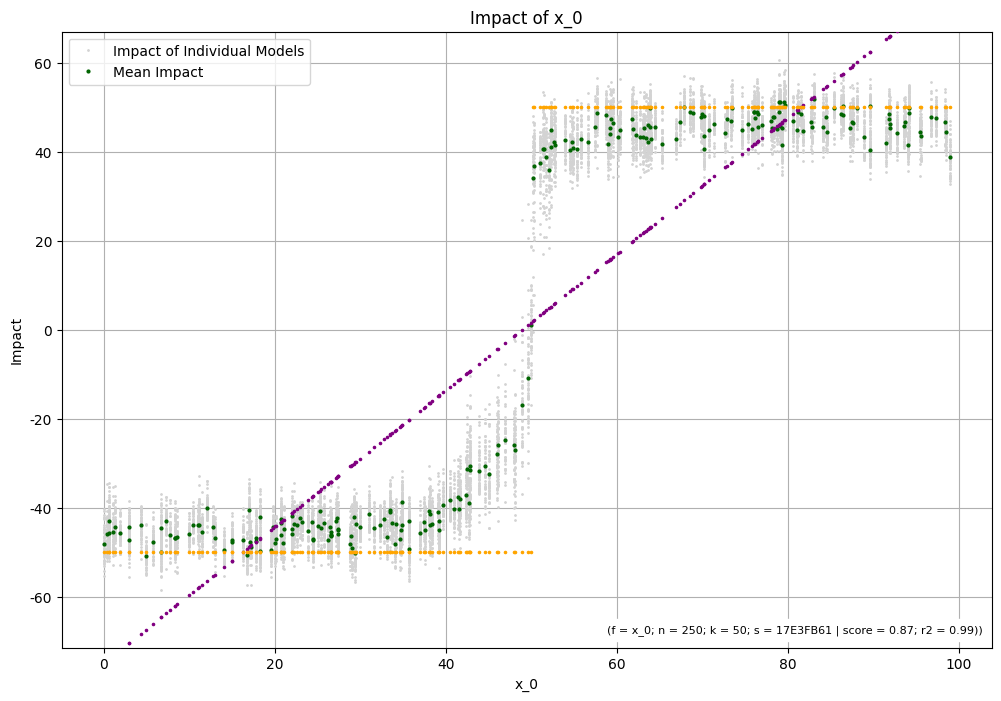

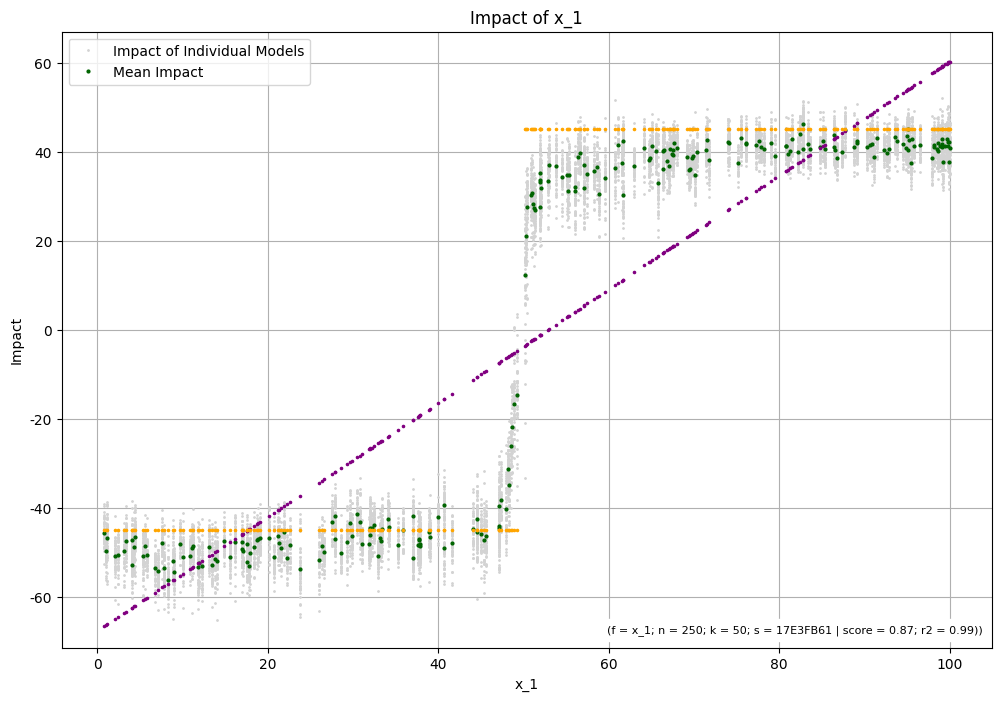

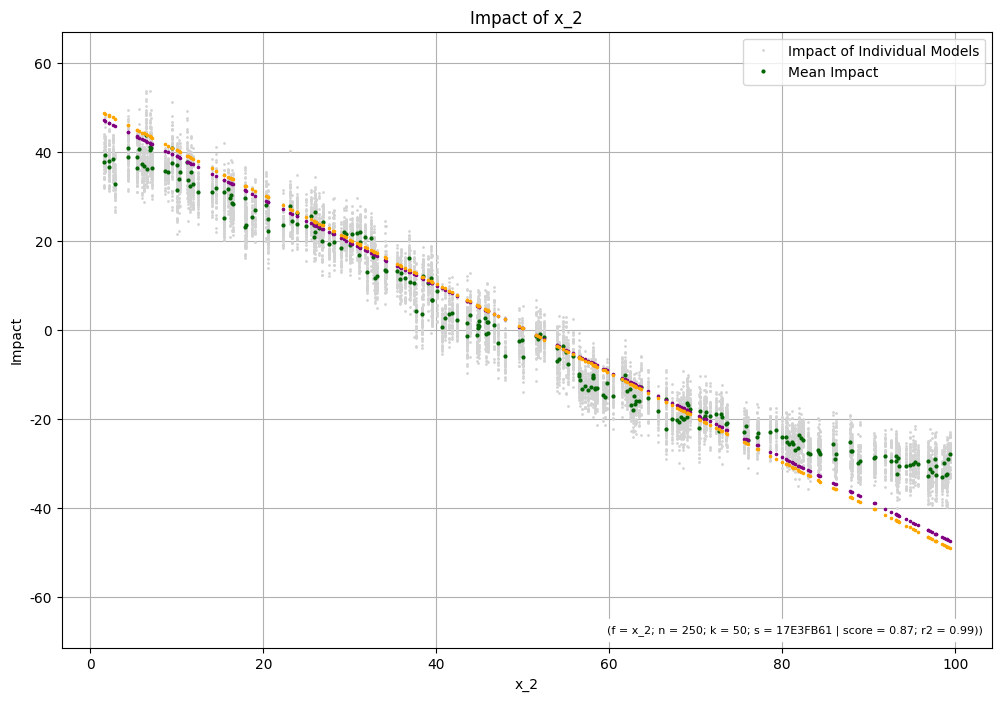

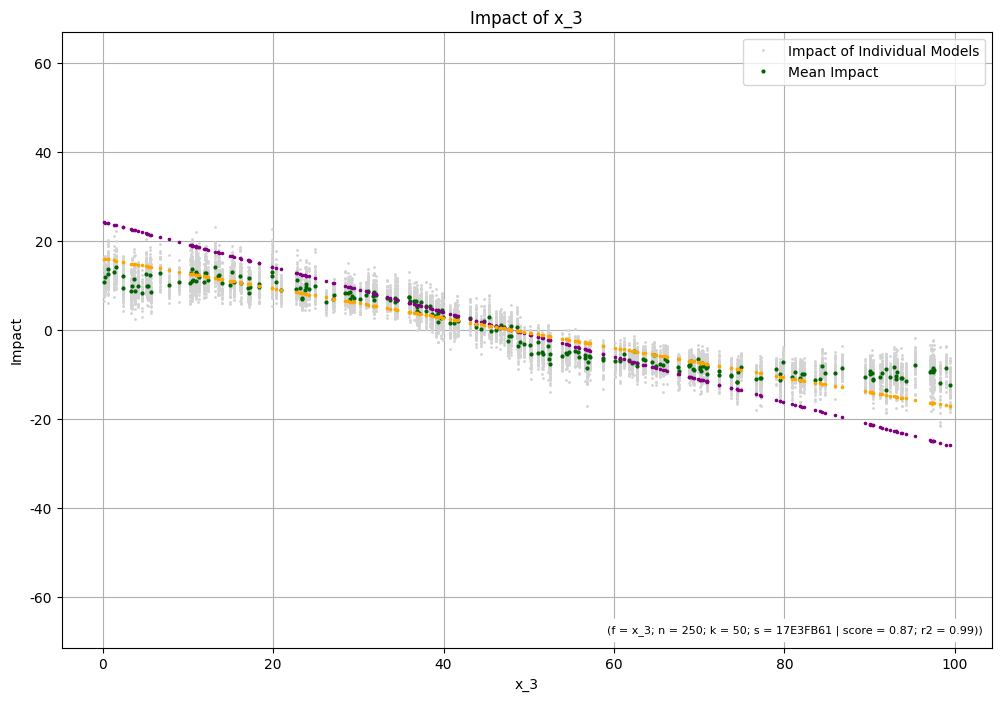

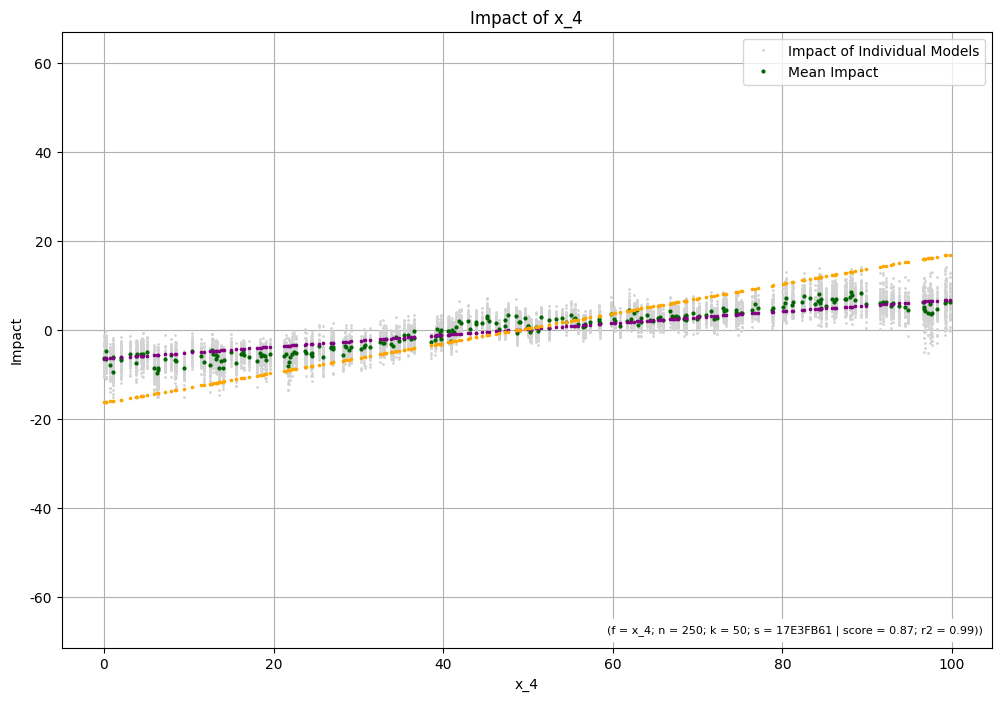

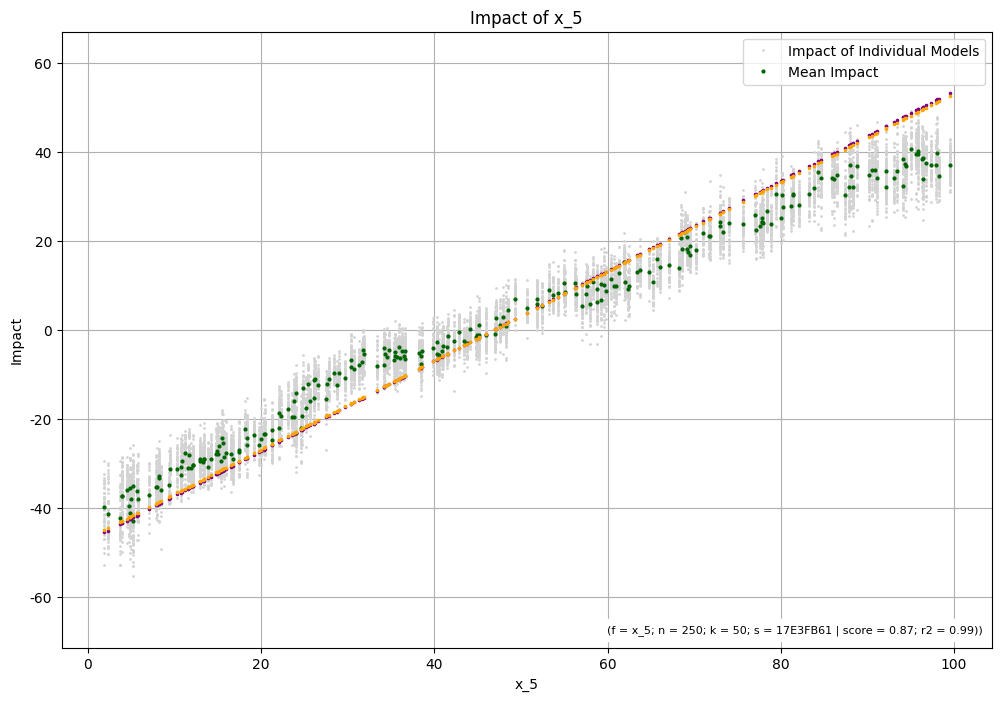

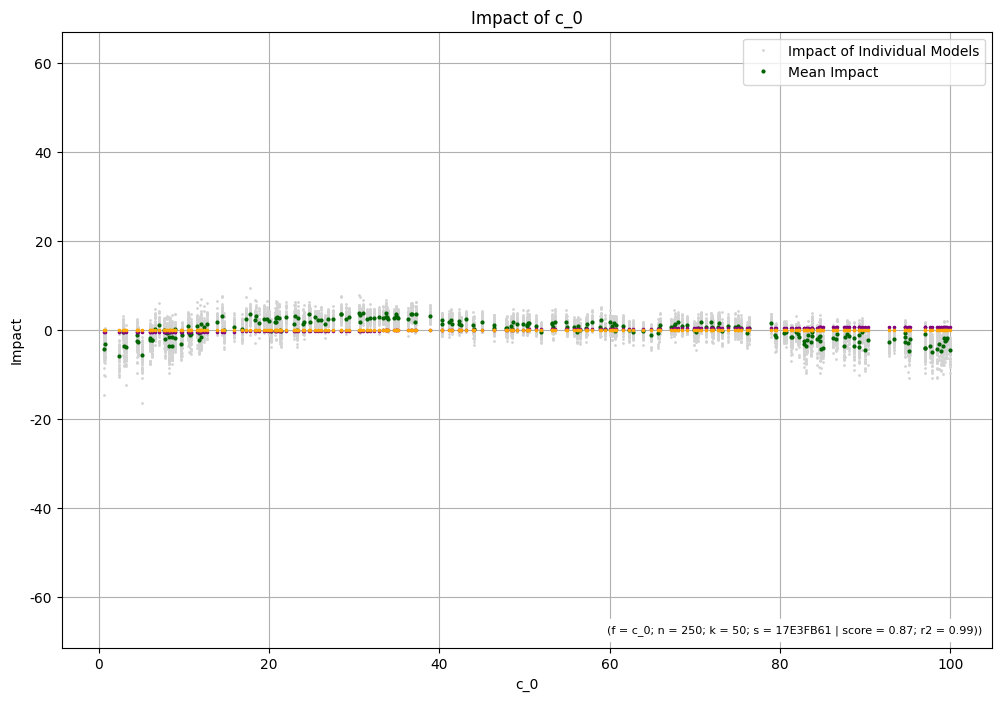

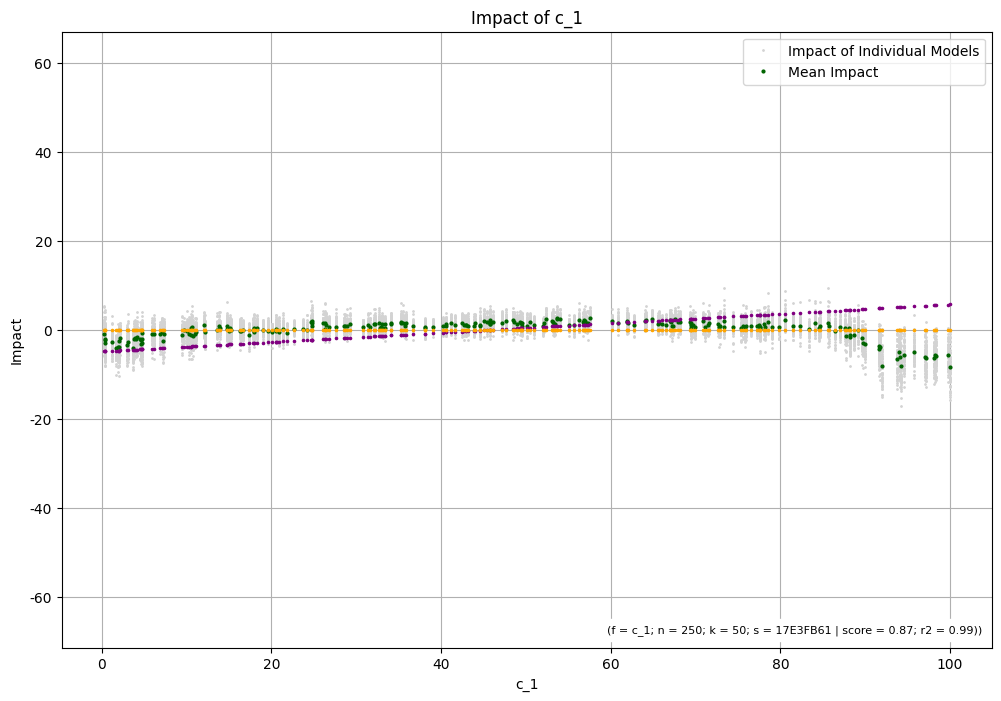

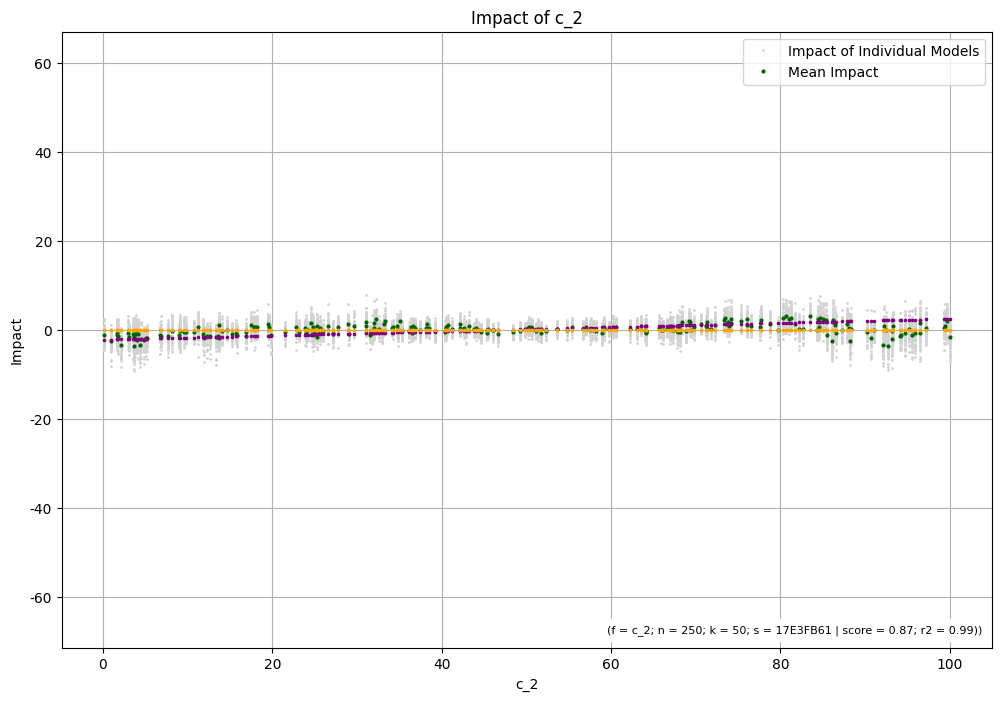

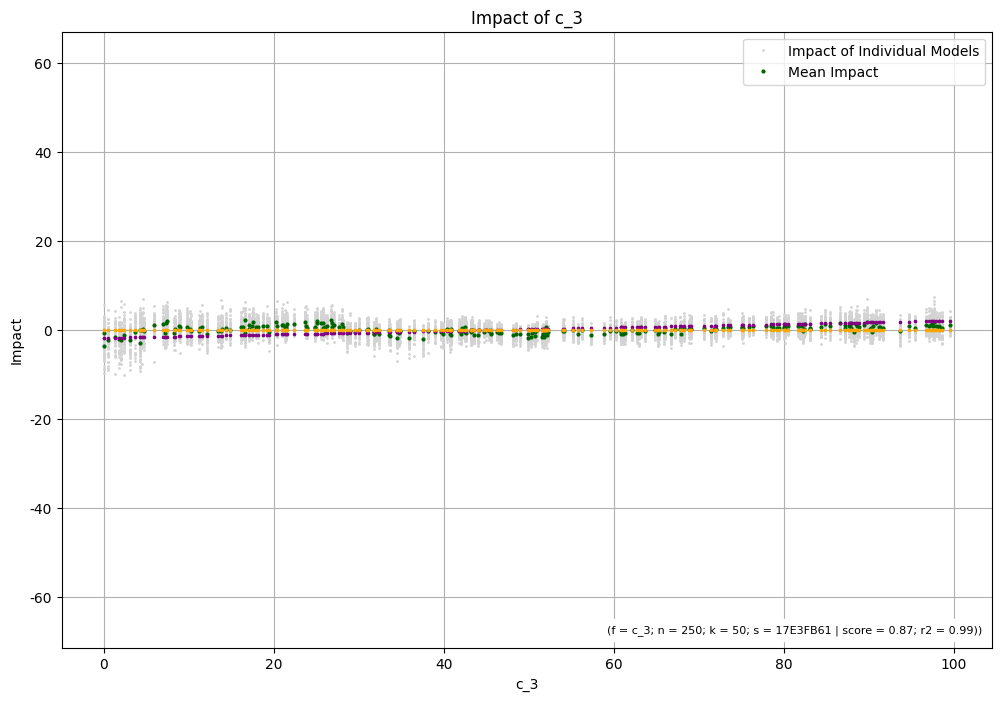

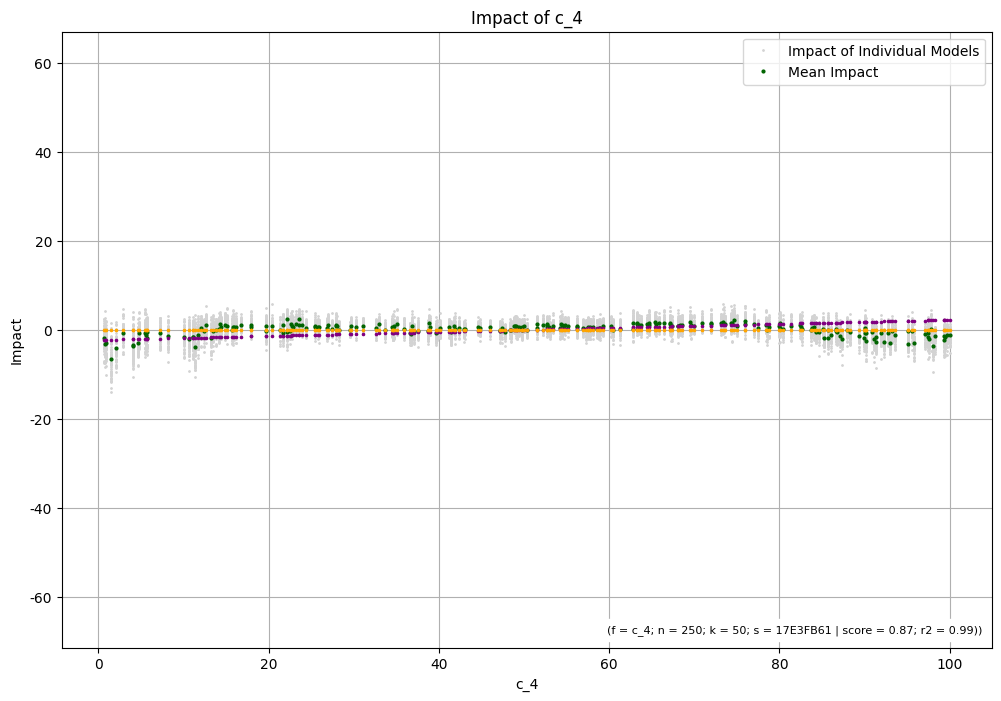

In [8]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [9]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,x_4,x_5,c_0,c_1,c_2,c_3,c_4,mu_x_i,mu_c_i
0,RMSE,8.563946,7.529315,6.826071,2.872048,5.182880,5.928665,2.203236,2.149881,1.218132,0.952321,1.305516,6.150488,1.565817
0,MAE,6.150918,5.716127,5.244485,2.256674,4.333183,4.988074,1.820888,1.562432,0.921030,0.762485,0.980191,4.781577,1.209405
0,MED_AE,4.929267,4.306593,4.089493,1.878236,3.593042,4.460023,1.639722,1.205893,0.687598,0.650417,0.769749,3.876109,0.990676
0,LR_RMSE,24.594116,23.725220,0.959289,4.823188,5.713815,0.320508,0.395152,3.050455,1.355491,1.107591,1.288089,10.022689,1.439356
0,LR_MAE,20.429214,19.503351,0.828465,4.099195,4.912706,0.280086,0.347874,2.623891,1.176441,0.953842,1.100508,8.342170,1.240511
0,LR_MED_AE,17.807992,16.190179,0.776282,3.877940,4.777802,0.276583,0.366666,2.632700,1.116980,0.930700,1.131484,7.284463,1.235706


In [11]:
scenario.linreg_r2(N)

0.7792171825661361

## A Multi-Scenario Experiment

In [12]:
experiment = ise.LinearAndStepWithNoiseExperiment(
    m_linear=M1, m_step=M2, s=S, sigma=SIGMA
)

In [13]:
df_model_errors = experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


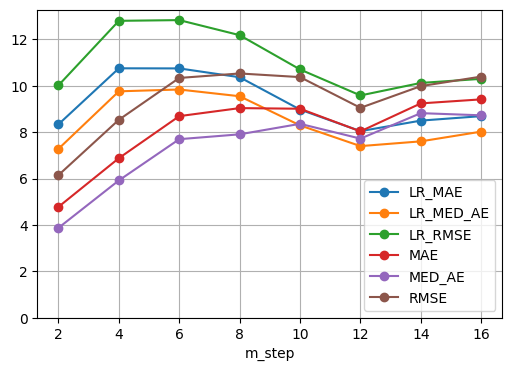

In [14]:
ax = None

for name, df_group in df_model_errors.groupby("metric"):
    ax = df_group.plot(
        "m_step", "mu_x_i", marker="o", ax=ax, label=name, figsize=(6, 4)
    )

ax.set_ylim(0.0, None)
ax.grid()

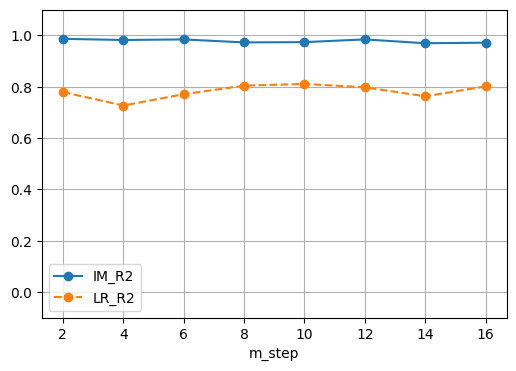

In [16]:
df_r2 = df_model_errors[df_model_errors["metric"] == "RMSE"][
    ["m_step", "IM_R2", "LR_R2"]
]

ax = df_r2.plot("m_step", "IM_R2", marker="o", figsize=(6, 4))
ax = df_r2.plot("m_step", "LR_R2", linestyle="dashed", marker="o", ax=ax)

ax.set_ylim(-0.1, 1.1)
ax.grid()